<a href="https://colab.research.google.com/github/RAm-SaGar-863/Capston_Project2-_News_Popularity_Prediction_in_Multiple_Social_Media/blob/main/Capston_Porject_2_News_Popularity_Prediction_in_Social_Media_Platforms_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U textblob
!pip install catboost


!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Text Data

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
sources = ['Facebook','GooglePlus','LinkedIn']
topics = ['Economy','Microsoft','Obama','Palestine']

folder_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter /Modules/Machine Learning/Projects/Supervised ML projects/Regression Project/News Popularity prediction Regression  project/data sets/'
master_df = pd.read_csv(folder_path+'News_Final.csv')
df = {}
for source in sources:
  for topic in topics:
    file_name = f'{source}_{topic}.csv'
    file_path = f'{folder_path}{file_name}'
    df[f'{source}_{topic}'] = pd.read_csv(file_path)

**Data sets**
1. Social Media Feedback Datasets(12 datasets)
2. News Dataset

#1. Scoial Media Feedback Datasets(12 Datasets)

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df['Facebook_Microsoft'].head()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12,TS13,TS14,TS15,TS16,TS17,TS18,TS19,TS20,TS21,TS22,TS23,TS24,TS25,TS26,TS27,TS28,TS29,TS30,TS31,TS32,TS33,TS34,TS35,TS36,TS37,TS38,TS39,TS40,TS41,TS42,TS43,TS44,TS45,TS46,TS47,TS48,TS49,TS50,TS51,TS52,TS53,TS54,TS55,TS56,TS57,TS58,TS59,TS60,TS61,TS62,TS63,TS64,TS65,TS66,TS67,TS68,TS69,TS70,TS71,TS72,TS73,TS74,TS75,TS76,TS77,TS78,TS79,TS80,TS81,TS82,TS83,TS84,TS85,TS86,TS87,TS88,TS89,TS90,TS91,TS92,TS93,TS94,TS95,TS96,TS97,TS98,TS99,TS100,TS101,TS102,TS103,TS104,TS105,TS106,TS107,TS108,TS109,TS110,TS111,TS112,TS113,TS114,TS115,TS116,TS117,TS118,TS119,TS120,TS121,TS122,TS123,TS124,TS125,TS126,TS127,TS128,TS129,TS130,TS131,TS132,TS133,TS134,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,101,-1,-1,-1,-1,-1,30,30,30,30,30,52,52,55,55,55,55,55,55,73,73,73,73,73,73,73,73,73,87,87,87,90,91,92,92,93,93,96,102,102,103,106,107,107,108,108,108,109,112,113,113,113,113,113,113,113,113,113,114,116,117,117,117,117,117,117,117,117,117,117,117,117,117,119,123,123,124,124,124,124,124,126,126,126,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,129,129,129,129,129,131,131,131,131,131,131,131,131,131,131,131,131,131,131,133,133
1,102,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,16,16,16,16,16,23,23,25,25,25,25,25,25,28,28,28,28,28,28,28,28,28,31,31,31,33,33,33,33,36,37,37,37,40,41,41,42,42,42,42,44,44,44,44,44,46,47,47,47,48,48,48,49,49,49,49,49,50,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,52,53,53,53,53,53,54,54,54,54,54,54,54,54,54,54,56,56,56,56,56,56,56,56,56,56,56,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,58,58,58
2,103,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,180,180,180,180,180,187,187,193,193,193,193,193,193,200,200,200,200,200,200,200,200,200,213,213,213,224,224,225,226,228,229,229,231,231,232,234,236,237,239,239,240,240,242,243,243,244,245,247,247,249,251,251,251,251,252,253,256,256,257,257,257,257,258,258,258,258,258,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,260,260,260,260,261,262,262,263
3,104,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
4,105,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,185,185,185,185,185,188,188,188,188,188,188,188,188,195,195,195,195,195,195,195,195,195,196,196,196,196,196,197,197,198,198,199,200,200,201,201,201,201,202,203,204,204,204,206,207,208,208,208,208,208,209,209,209,209,209,210,216,228,236,239,242,245,247,253,260,260,260,272,274,274,277,277,277,277,277,286,289,289,296,296,296,300,303,303,303,307,307,307,307,307,307,310,310,312,312,312,312,312,313,313,313,313,314,314,315,315,316,316,316,316,316,316


In [ ]:
df['Facebook_Microsoft'].shape

(18531, 145)

In [ ]:
df['Facebook_Microsoft'].tail()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12,TS13,TS14,TS15,TS16,TS17,TS18,TS19,TS20,TS21,TS22,TS23,TS24,TS25,TS26,TS27,TS28,TS29,TS30,TS31,TS32,TS33,TS34,TS35,TS36,TS37,TS38,TS39,TS40,TS41,TS42,TS43,TS44,TS45,TS46,TS47,TS48,TS49,TS50,TS51,TS52,TS53,TS54,TS55,TS56,TS57,TS58,TS59,TS60,TS61,TS62,TS63,TS64,TS65,TS66,TS67,TS68,TS69,TS70,TS71,TS72,TS73,TS74,TS75,TS76,TS77,TS78,TS79,TS80,TS81,TS82,TS83,TS84,TS85,TS86,TS87,TS88,TS89,TS90,TS91,TS92,TS93,TS94,TS95,TS96,TS97,TS98,TS99,TS100,TS101,TS102,TS103,TS104,TS105,TS106,TS107,TS108,TS109,TS110,TS111,TS112,TS113,TS114,TS115,TS116,TS117,TS118,TS119,TS120,TS121,TS122,TS123,TS124,TS125,TS126,TS127,TS128,TS129,TS130,TS131,TS132,TS133,TS134,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
18526,58442,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
18527,58443,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18528,58448,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
18529,58449,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18530,58450,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [ ]:
df['Facebook_Microsoft'].sample(6)

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12,TS13,TS14,TS15,TS16,TS17,TS18,TS19,TS20,TS21,TS22,TS23,TS24,TS25,TS26,TS27,TS28,TS29,TS30,TS31,TS32,TS33,TS34,TS35,TS36,TS37,TS38,TS39,TS40,TS41,TS42,TS43,TS44,TS45,TS46,TS47,TS48,TS49,TS50,TS51,TS52,TS53,TS54,TS55,TS56,TS57,TS58,TS59,TS60,TS61,TS62,TS63,TS64,TS65,TS66,TS67,TS68,TS69,TS70,TS71,TS72,TS73,TS74,TS75,TS76,TS77,TS78,TS79,TS80,TS81,TS82,TS83,TS84,TS85,TS86,TS87,TS88,TS89,TS90,TS91,TS92,TS93,TS94,TS95,TS96,TS97,TS98,TS99,TS100,TS101,TS102,TS103,TS104,TS105,TS106,TS107,TS108,TS109,TS110,TS111,TS112,TS113,TS114,TS115,TS116,TS117,TS118,TS119,TS120,TS121,TS122,TS123,TS124,TS125,TS126,TS127,TS128,TS129,TS130,TS131,TS132,TS133,TS134,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
13672,42438,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,18,20,20,22,23,23,25,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,59,60,60,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
14273,44139,-1,7,7,7,7,7,7,8,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
15668,48330,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2192,6123,-1,-1,-1,12,12,16,16,18,18,18,18,22,22,22,23,23,24,24,24,24,24,26,27,27,31,31,31,31,31,31,31,31,31,31,31,32,33,34,35,35,35,35,37,39,39,39,39,39,39,40,41,41,41,45,45,45,46,46,46,46,46,46,46,46,46,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,51,51,51,51,51,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
3470,9609,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2310,6469,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [ ]:
# Checking the null values

for d in df:
  print(f'Null Values of {d}:',sum(df[d].isna().sum()))

Null Values of Facebook_Economy: 0
Null Values of Facebook_Microsoft: 0
Null Values of Facebook_Obama: 0
Null Values of Facebook_Palestine: 0
Null Values of GooglePlus_Economy: 0
Null Values of GooglePlus_Microsoft: 0
Null Values of GooglePlus_Obama: 0
Null Values of GooglePlus_Palestine: 0
Null Values of LinkedIn_Economy: 0
Null Values of LinkedIn_Microsoft: 0
Null Values of LinkedIn_Obama: 0
Null Values of LinkedIn_Palestine: 0


#2. News Dataset

In [ ]:
news_df = pd.read_csv(folder_path+'News_Final.csv')
master_df = news_df.copy()
master_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [ ]:
master_df.sample(6)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
32056,20179.0,British economy ends year at steady rate amid ...,LONDON - Britain's economy ended 2015 at a ste...,The Canadian Press via Yahoo Canada News,economy,2016-01-28 02:34:00,-0.177878,-0.186341,0,0,0
31960,20129.0,"Philippine Q4 Growth At 1-Year High, Though 20...",The Philippine economy grew the most in a year...,RTT News,economy,2016-01-27 22:35:00,-0.138350,-0.130431,0,0,0
70642,95159.0,FACT SHEET: Obama Administration Efforts that ...,"Throughout his presidency, President Obama has...",Whitehouse.gov (press release),obama,2016-05-06 00:00:00,-0.066291,0.192773,14,0,8
76550,97976.0,Obama banishing Vietnam War vestige by lifting...,(AP Photo/Carolyn Kaster). U.S. President Bara...,Newschannel 6 Wichita Falls,obama,2016-05-23 12:14:00,-0.250000,-0.041790,0,0,0
70095,47273.0,Microsoft to retire support for SHA1 certifica...,Microsoft to retire support for SHA1 certifica...,Ars Technica,microsoft,2016-05-04 17:13:21,-0.263822,-0.406250,49,13,103
82491,104627.0,Obama congratulates Clinton on clinching Democ...,Obama also spoke with Sen. Bernie Sanders of V...,CNBC,obama,2016-06-07 21:13:00,0.047246,0.088388,-1,-1,-1


In [ ]:
master_df.tail()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0
93238,61870.0,Sausalito businesswoman wins $10000 in Microso...,"Goldstein, the proprietor of the TG Travel Gro...",East Bay Times,microsoft,2016-07-07 16:16:11,0.000000,0.054554,-1,1,0


In [ ]:
master_df.shape

(93239, 11)

In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [ ]:
master_df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000
mean,51560.653257,-0.005411,-0.027493,113.141336,3.888362,16.547957
std,30391.078704,0.136431,0.141964,620.173233,18.492648,154.459048
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24301.500000,-0.079057,-0.114574,0.000000,0.000000,0.000000
50%,52275.000000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76585.500000,0.064255,0.059709,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


#Data Cleaning and Refactoring

In [ ]:
# Inceasing popularity level by 1 to deal with level -1

for col in sources:
  master_df[col] = master_df[col].apply(lambda x: x+1)

for idf in df:
  for col in df[idf]:
    if col == 'IDLink':
      continue
    df[idf][col] +=1

In [ ]:
df['Facebook_Economy'].head()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12,TS13,TS14,TS15,TS16,TS17,TS18,TS19,TS20,TS21,TS22,TS23,TS24,TS25,TS26,TS27,TS28,TS29,TS30,TS31,TS32,TS33,TS34,TS35,TS36,TS37,TS38,TS39,TS40,TS41,TS42,TS43,TS44,TS45,TS46,TS47,TS48,TS49,TS50,TS51,TS52,TS53,TS54,TS55,TS56,TS57,TS58,TS59,TS60,TS61,TS62,TS63,TS64,TS65,TS66,TS67,TS68,TS69,TS70,TS71,TS72,TS73,TS74,TS75,TS76,TS77,TS78,TS79,TS80,TS81,TS82,TS83,TS84,TS85,TS86,TS87,TS88,TS89,TS90,TS91,TS92,TS93,TS94,TS95,TS96,TS97,TS98,TS99,TS100,TS101,TS102,TS103,TS104,TS105,TS106,TS107,TS108,TS109,TS110,TS111,TS112,TS113,TS114,TS115,TS116,TS117,TS118,TS119,TS120,TS121,TS122,TS123,TS124,TS125,TS126,TS127,TS128,TS129,TS130,TS131,TS132,TS133,TS134,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,0,0,0,0,0,0,0,0,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,11,11,11,11,11,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
1,2,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,16,16,16,18,18,19,19,20,20,22,23,23,24,24,25,26,26,26,26,26,26,26,28,29,29,31,31,32,32,32,33,34,34,34,34,34,34,35,35,36,36,37,37,37,37,37,38,38,39,39,39,39,39,42,42,42,42,42,42,42,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,65,65,65,65,70,70,73,73,73,73,73,73,79,79,79,79,79,79,79,79,79,83,83,83,83,84,85,85,85,85,85,87,87,87,87,87,87,87,87,87,87,87,87,87,87,89,89,89,89,90,91,91,91,91,91,93,93,94,94,95,96,97,98,98,98,98,98,98,98,98,98,98,98,98,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,21,21,21,21,24,24,24,24,24,24,24,24,28,28,28,28,28,28,28,28,28,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,31,31,31,31,33,33,34,34,34,34,34,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35


In [ ]:
#check Null Values

print(master_df.isna().sum())
print('\n')
print(master_df.Source.value_counts()[:3])

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64


Bloomberg    1732
Reuters      1321
ABC News     1098
Name: Source, dtype: int64


#Dealing with Null/Missing Values

In [ ]:
master_df['Source'].value_counts()[:10]

Bloomberg           1732
Reuters             1321
ABC News            1098
New York Times       992
The Guardian         933
Business Insider     884
Economic Times       787
Forbes               781
Washington Post      774
CNN                  742
Name: Source, dtype: int64

In [ ]:
# Handlig Missing Value and Cleaning
# master_df[master_df['Source'].isna()].Source = 'Bloomerg'
master_df['Source'].fillna('Bloomberg',inplace=True)
master_df.dropna(inplace=True)


In [ ]:
# Publishdate change type to datetime from object

def convert_to_dt(df):
  df['PublishDate'] = pd.to_datetime(df['PublishDate'])
  df['PublishTime'] = df['PublishDate'].dt.time
  df['PublishDate'] = df['PublishDate'].dt.date

In [ ]:
convert_to_dt(master_df)

In [ ]:
#Extracting day of the week

master_df['Weekday'] = master_df.PublishDate.apply(lambda x: calendar.day_name[x.weekday()])

In [ ]:
master_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02,0.000000,-0.053300,0,0,0,00:00:00,Tuesday
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20,0.208333,-0.156386,0,0,0,00:00:00,Saturday
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28,-0.425210,0.139754,0,0,0,00:00:00,Saturday
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01,0.000000,0.026064,0,0,0,00:06:00,Sunday
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01,0.000000,0.141084,0,0,0,00:11:00,Sunday


In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93224 entries, 0 to 93238
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93224 non-null  float64
 1   Title              93224 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             93224 non-null  object 
 4   Topic              93224 non-null  object 
 5   PublishDate        93224 non-null  object 
 6   SentimentTitle     93224 non-null  float64
 7   SentimentHeadline  93224 non-null  float64
 8   Facebook           93224 non-null  int64  
 9   GooglePlus         93224 non-null  int64  
 10  LinkedIn           93224 non-null  int64  
 11  PublishTime        93224 non-null  object 
 12  Weekday            93224 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 10.0+ MB


In [ ]:
'''
converting source values to lower:  we found out that some values of the
source column are present more than once in different letter-case
'''

print('No. of Distinct Sources in Original Data set: ',master_df['Source'].nunique())
master_df['Source'] = master_df['Source'].apply(lambda x:x.lower())
print('No. of Distinct Sources in Original Data set: ',master_df['Source'].nunique())

No. of Distinct Sources in Original Data set:  5755
No. of Distinct Sources in Original Data set:  5740


# Trash Data

In [ ]:
# Handling date range
print('Strat Date: ',master_df['PublishDate'].min())
print('End Date: ',master_df['PublishDate'].max())

#Taking values between range 2015 November to 2016 July
master_df = master_df[(master_df['PublishDate'] >= pd.to_datetime('2015-11-01').date()) & (master_df['PublishDate'] <= pd.to_datetime('2016-08-01').date())]

print('Start Date: ',master_df['PublishDate'].min())
print('End Date: ',master_df['PublishDate'].max())

Strat Date:  2002-04-02
End Date:  2016-07-07
Start Date:  2015-11-01
End Date:  2016-07-07


In [ ]:
master_df.shape

(92812, 13)

In [ ]:
#dropping rows whose popularity is -1 in all the social media platforms

index_to_drop = master_df[(master_df['Facebook']== 0) & (master_df['GooglePlus']== 0) & (master_df['LinkedIn'] == 0)].index


master_df.drop(index_to_drop,inplace=True)
print('Shape After Droping: ',master_df.shape)

Shape After Droping:  (87481, 13)


In [ ]:
# Dropping Duplicate rows

print(master_df[master_df.duplicated()])
master_df.drop_duplicates(inplace=True)

        IDLink                Title  \
44426  80690.0  Monday, 29 Feb 2016   
44944  80994.0  Tuesday, 1 Mar 2016   
45122  81052.0  Monday, 29 Feb 2016   

                                                Headline     Source  \
44426  RAMALLAH, February 25, 2016 (WAFA) - Palestine...  bloomberg   
44944  RAMALLAH, February 29, 2016 (WAFA) - The Gover...  bloomberg   
45122  RAMALLAH, February 29, 2016 (WAFA) - The Gover...  bloomberg   

           Topic PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
44426  palestine  2016-02-28        0.000000          -0.005906         1   
44944  palestine  2016-03-01       -0.243068           0.048546         1   
45122  palestine  2016-03-01        0.000000           0.048546         1   

       GooglePlus  LinkedIn PublishTime  Weekday  
44426           1         1    14:03:00   Sunday  
44944           1         1    00:15:00  Tuesday  
45122           1         1    09:29:00  Tuesday  


In [ ]:
master_df.shape

(87478, 13)

#outlier Treatment

<ipython-input-34-2d2b8ba08a71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0][source],x=df[sources[source]])
<ipython-input-34-2d2b8ba08a71>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0][source],x=df[sources[source]])
<ipython-input-34-2d2b8ba08a71>:5: UserWarning: 



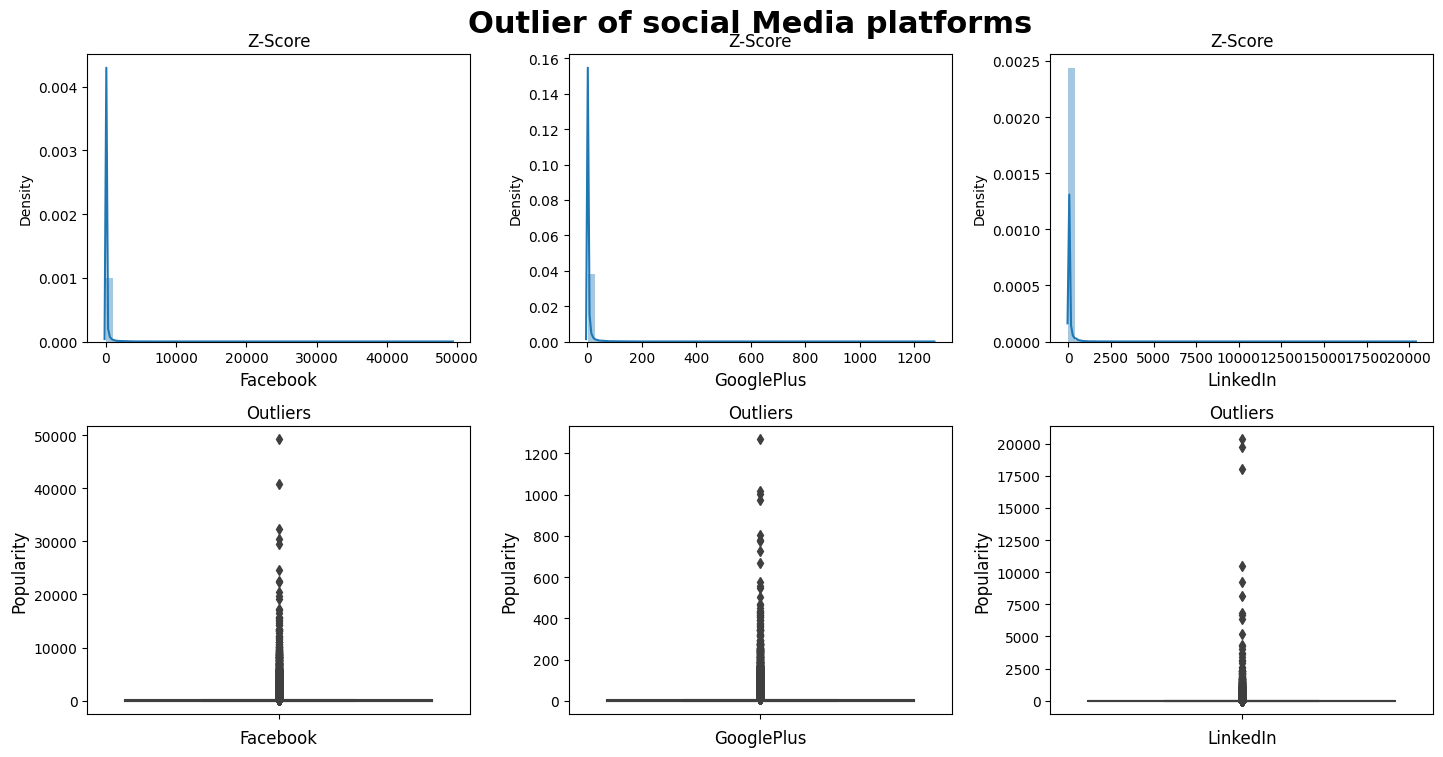

In [ ]:
def show_outliers(df,three_d=False):
  fig,axes = plt.subplots(2,3,figsize=(15,8))
  fig.tight_layout(pad=4.0)
  for source in range(len(sources)):
    sns.distplot(ax=axes[0][source],x=df[sources[source]])
    axes[0][source].set_xlabel(sources[source],fontdict={'fontsize':12})
    axes[1][source].set_ylabel('Density',fontdict={'fontsize':12})

    sns.boxplot(ax=axes[1][source],y=df[sources[source]])
    axes[1][source].set_xlabel(sources[source],fontdict={'fontsize':12})
    axes[1][source].set_ylabel('Popularity',fontdict={'fontsize':12})

    axes[0][source].set_title('Z-Score')
    axes[1][source].set_title('Outliers')

    plt.suptitle('Outlier of social Media platforms',fontsize=22,fontweight='bold')

  plt.show()

  if three_d == True:
    fig = px.scatter_3d(df,x='Facebook',y='GooglePlus',z='LinkedIn',title='Dependent Variables')
    fig.show()

show_outliers(master_df,True)

In [ ]:
np.percentile(master_df['Facebook'],90)

193.0

In [ ]:
def outliers_treatment(df, sources):
    for source in sources:
        # tenth_percentile = np.percentile(df[source], 10)
        ninetieth_percentile = np.percentile(df[source], 90)
        # df[source] = np.where(df[source] < tenth_percentile, tenth_percentile, df[source])
        df[source] = np.where(df[source] > ninetieth_percentile, ninetieth_percentile, df[source])

    return df


In [ ]:
master_df = outliers_treatment(master_df,sources)

<ipython-input-34-2d2b8ba08a71>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-2d2b8ba08a71>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-2d2b8ba08a71>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

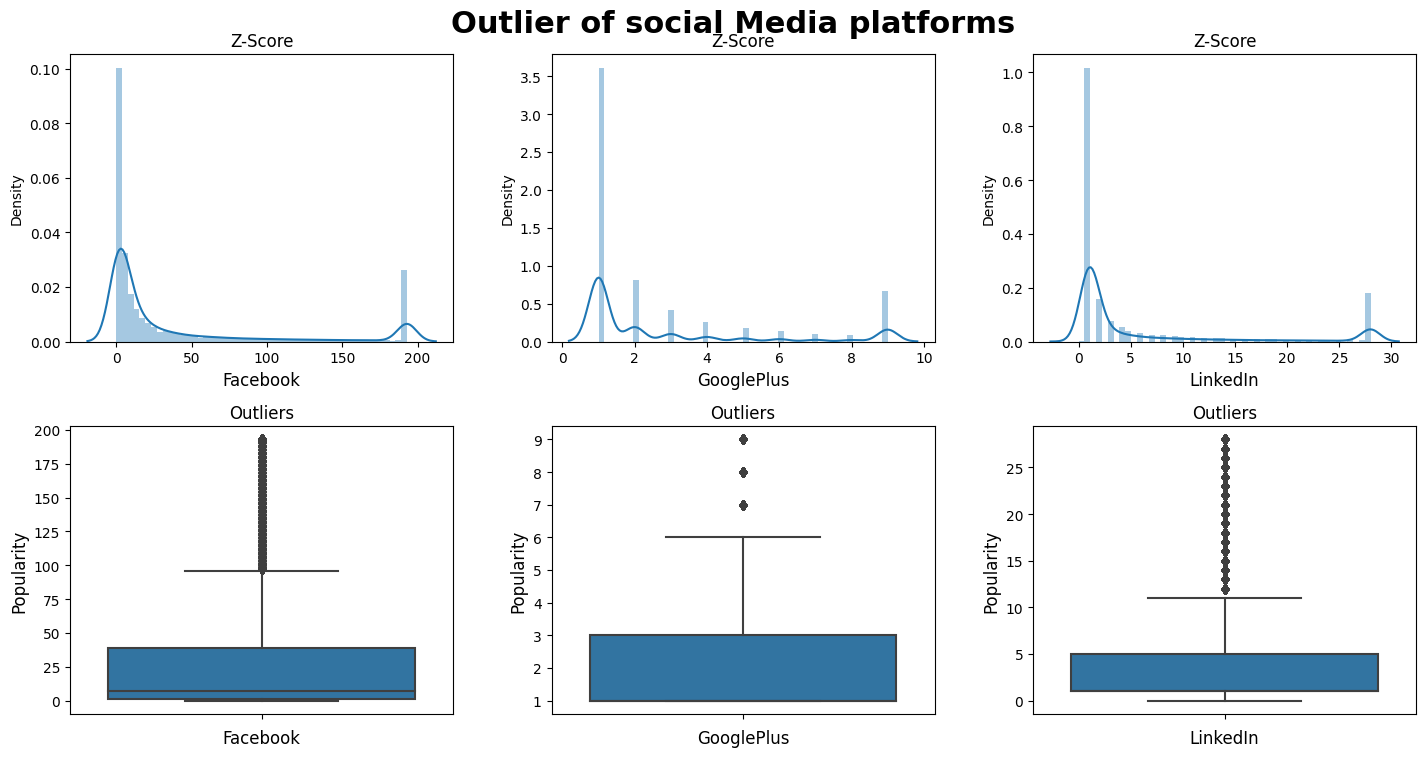

In [ ]:
show_outliers(master_df,True)

In [ ]:
#Standardize data
scaler = StandardScaler()

for source in sources:
    master = master_df[source].apply(lambda x:x if x!=(0) else np.nan)  # We excluded level 0 because actually it's level -1, which we are not considering.
    master_df[f'{source}_scaled'] = scaler.fit_transform(master.values.reshape(-1,1))

    master_df[f'{source}_scaled'].fillna(0,inplace=True) # Reversed our first step.
    master_df[source].fillna(0,inplace=True)

In [ ]:
def after_transf_show_outliers(df,three_d=False):
  fig,axes = plt.subplots(2,3,figsize=(15,8))
  fig.tight_layout(pad=4.0)
  for source in range(len(sources)):
    sns.distplot(ax=axes[0][source],x=df[f'{sources[source]}_scaled'])
    axes[0][source].set_xlabel(sources[source],fontdict={'fontsize':12})
    axes[1][source].set_ylabel('Density',fontdict={'fontsize':12})

    sns.boxplot(ax=axes[1][source],y=df[f'{sources[source]}_scaled'])
    axes[1][source].set_xlabel(sources[source],fontdict={'fontsize':12})
    axes[1][source].set_ylabel('Popularity',fontdict={'fontsize':12})

    axes[0][source].set_title('Z-Score')
    axes[1][source].set_title('Outliers')

    plt.suptitle('Outlier of social Media platforms',fontsize=22,fontweight='bold')

  plt.show()

  if three_d == True:
    fig = px.scatter_3d(df,x='Facebook',y='GooglePlus',z='LinkedIn',title='Dependent Variables')
    fig.show()


<ipython-input-40-4c289b8d4f06>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-40-4c289b8d4f06>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-40-4c289b8d4f06>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

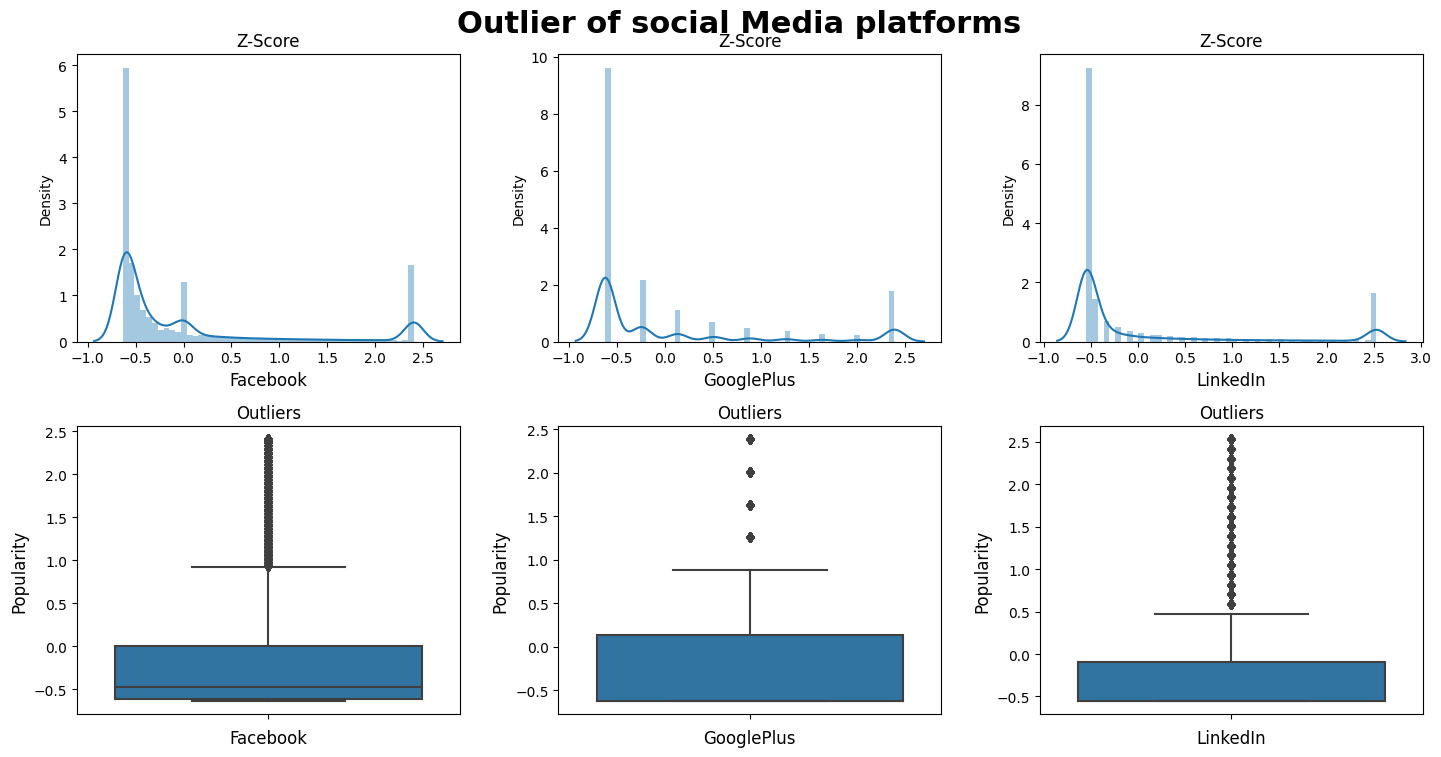

In [ ]:
after_transf_show_outliers(master_df,sources)

In [ ]:
master_df.reset_index(inplace=True,drop=True)
master_df.head(2)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",bloomberg,palestine,2016-02-28,0.0,-0.005906,1.0,1.0,1.0,14:03:00,Sunday,-0.633726,-0.617774,-0.549169
1,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,0.0,0.048546,1.0,1.0,1.0,09:29:00,Tuesday,-0.633726,-0.617774,-0.549169


#Explotary Data Analysis

**Categorizing SentimentTitle and SentimentHeadline**

In [ ]:
master_df[['SentimentTitle','SentimentHeadline']].describe()

,SentimentTitle,SentimentHeadline
count,87478.000000,87478.000000
mean,-0.005291,-0.027393
std,0.136353,0.142081
min,-0.950694,-0.755433
25%,-0.078813,-0.114228
50%,0.000000,-0.026064
75%,0.065057,0.059963
max,0.962354,0.964646


In [ ]:
'''
We have categoried the sentiment title and sentiment headline into three different categories based on their sentiment scores:

-> Positive
-> Negative
-> Neutral
'''

master_df['SentimentTitle_Category'] = master_df['SentimentTitle'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')
master_df['SentimentHeadline_Category'] = master_df['SentimentHeadline'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')
master_df.head(2)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled,SentimentTitle_Category,SentimentHeadline_Category
0,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",bloomberg,palestine,2016-02-28,0.0,-0.005906,1.0,1.0,1.0,14:03:00,Sunday,-0.633726,-0.617774,-0.549169,neutral,negative
1,81052.0,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",bloomberg,palestine,2016-03-01,0.0,0.048546,1.0,1.0,1.0,09:29:00,Tuesday,-0.633726,-0.617774,-0.549169,neutral,positive


In [ ]:
def plot_no_of_news_sentiment_title(df):
  print('********** No. of News items of SentimentTitle **********')
  print(df.SentimentTitle_Category.value_counts(),'\n')

  plt.figure(figsize=(10,8))
  df.SentimentTitle_Category.value_counts().plot(kind='bar')
  plt.title('News Items Distribution of Each Sentiment Title',fontdict = {'size':20,'fontweight':'bold'})
  plt.xlabel('Sentiment Type',fontdict = {'size':15})
  plt.ylabel('No. of News Items',fontdict={'size':15})

def plot_no_of_news_sentiment_headline(df):
  print('********** No. of News items of SentimentHeadline **********')
  print(df.SentimentHeadline_Category.value_counts(),'\n')

  plt.figure(figsize=(10,8))
  df.SentimentHeadline_Category.value_counts().plot(kind='bar')
  plt.title('News Items Distribution of Each Sentiment Headline ',fontdict = {'size':20,'fontweight':'bold'})
  plt.xlabel('Sentiment Type',fontdict = {'size':15})
  plt.ylabel('No. of News Items',fontdict={'size':15})


********** No. of News items of SentimentTitle **********
negative    35484
positive    34377
neutral     17617
Name: SentimentTitle_Category, dtype: int64 



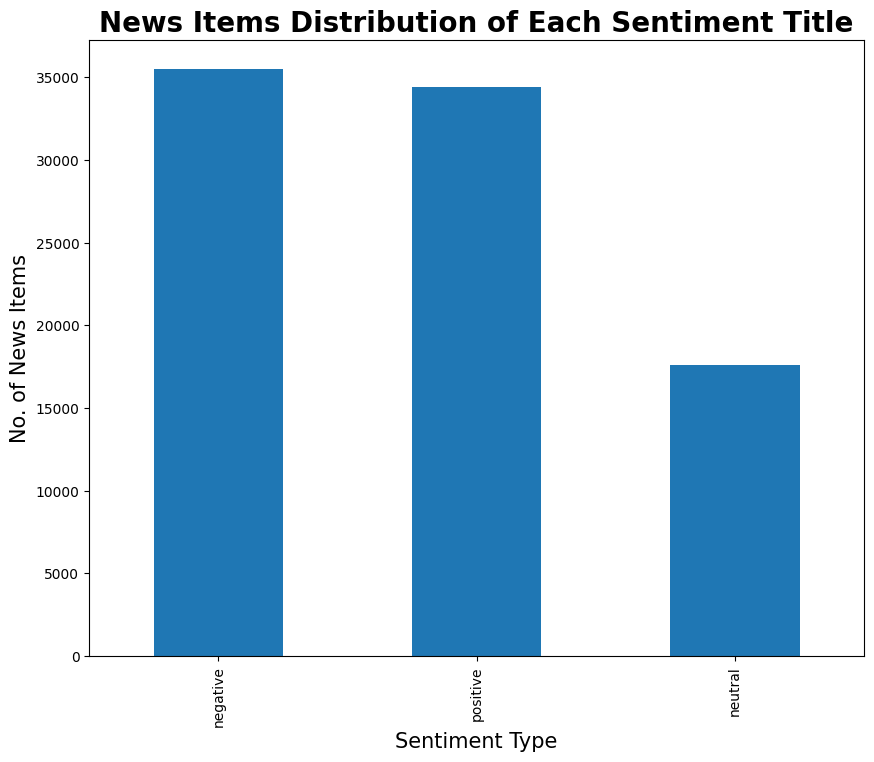

In [ ]:
plot_no_of_news_sentiment_title(master_df)

********** No. of News items of SentimentHeadline **********
negative    49452
positive    35328
neutral      2698
Name: SentimentHeadline_Category, dtype: int64 



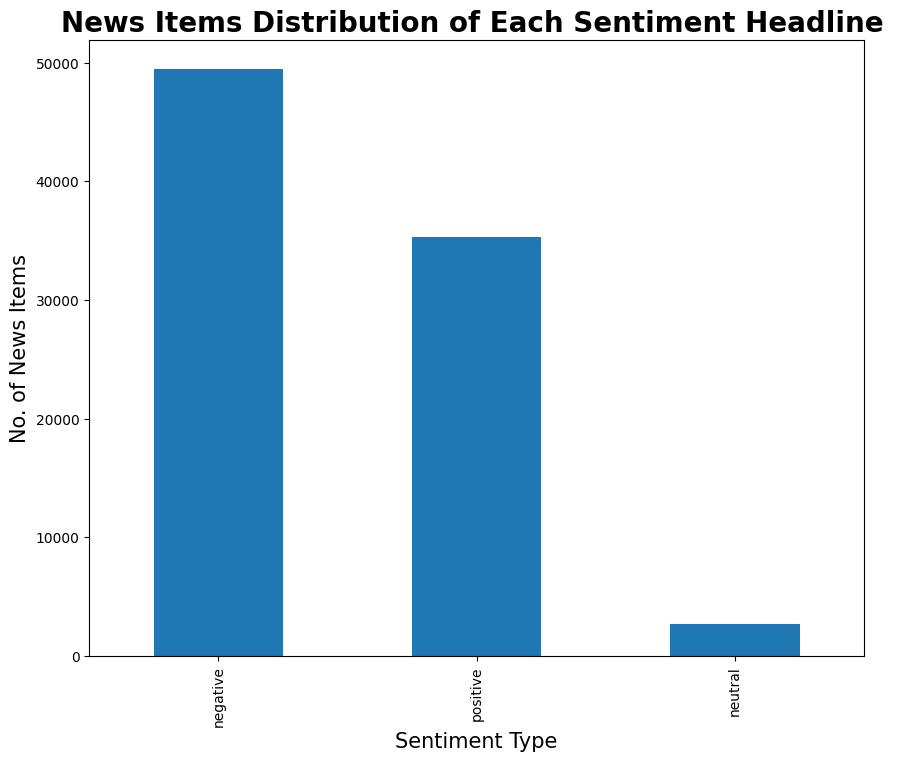

In [ ]:
plot_no_of_news_sentiment_headline(master_df)

#categorizing Sources

In [ ]:
'''
As we can see that we have a lot of news outlets, but it's strenuous to work with such huge amount of varied data.
So, we categoried the news outlets primarily into four main categories based on their number of news items published:

-> Source A
-> Source B
-> Source C
-> Source D
'''

q1 = np.percentile(master_df['Source'].value_counts().unique(),25,method='midpoint')
q2 = np.percentile(master_df['Source'].value_counts().unique(),50,method='midpoint')
q3 = np.percentile(master_df['Source'].value_counts().unique(),75,method='midpoint')
print('--------Quaters-------')
print('> q1:',q1,'\n> q2:',q2,'\n> q3:',q3)

source_df = pd.DataFrame(master_df['Source'].value_counts())
master_df['Source_type'] = master_df['Source'].apply(lambda x: 'A' if source_df['Source'][x] <= q1 else 'B'
                                                        if source_df['Source'][x] <= q2 else 'C' if source_df['Source'][x] <= q3 else 'D')

master_df.drop(columns=['Source'],inplace=True)



--------Quaters-------
> q1: 57.0 
> q2: 124.0 
> q3: 261.0


*************No. of News items in Sources **************
A    31866
D    28934
C    14436
B    12242
Name: Source_type, dtype: int64 



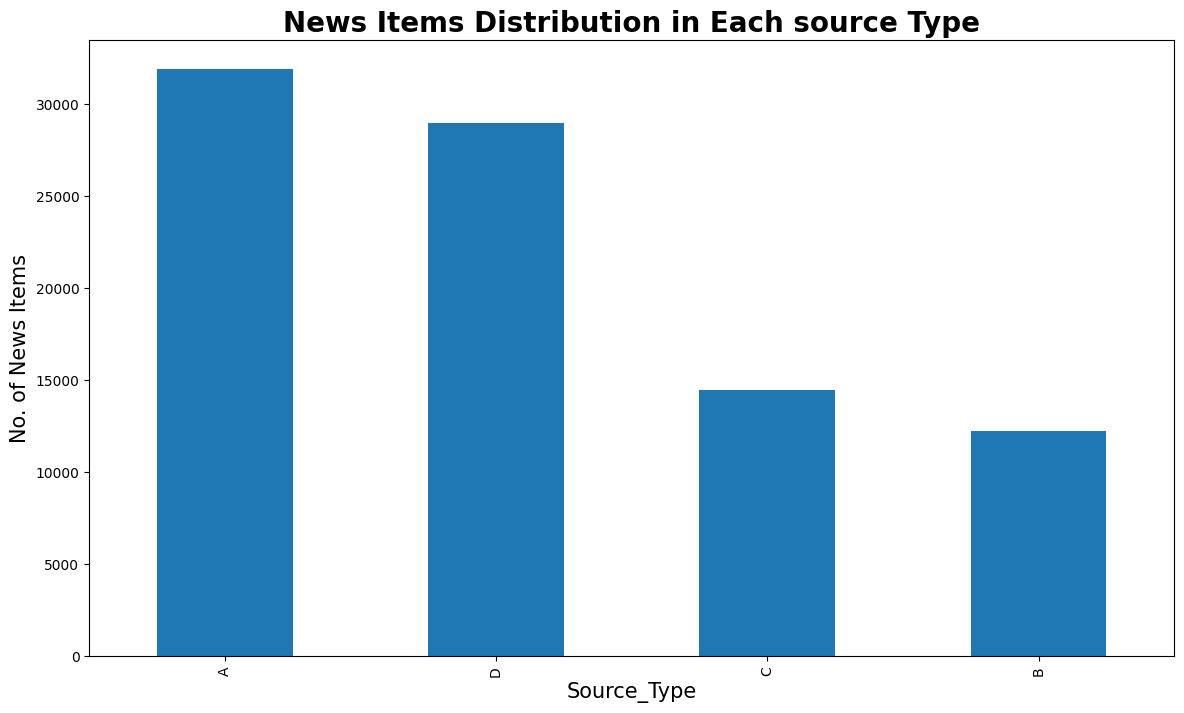

In [ ]:
# News items Distribution

def plot_news_distribution_in_sources(df):
  print('*************No. of News items in Sources **************')
  print(df.Source_type.value_counts(),'\n')

  plt.figure(figsize=(14,8))
  df.Source_type.value_counts().plot(kind='bar')
  plt.title('News Items Distribution in Each source Type',fontdict = {'size':20,'fontweight':'bold'})
  plt.xlabel('Source_Type',fontdict={'size':15})
  plt.ylabel('No. of News Items',fontdict={'size':15})

plot_news_distribution_in_sources(master_df)